In [3]:
%matplotlib inline
import cv2
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np
from __future__ import division

In [4]:
def show(image):
    # Figure size in inches
    plt.figure(figsize=(15, 15))
    
    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')
    
def show_hsv(hsv):
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    show(rgb)
    
def show_mask(mask):
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray')
    
def overlay_mask(mask, image):
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    show(img)

In [69]:
image = cv2.imread('8_1.png')
image.shape

(756, 1008, 3)

In [79]:
0.84573 0.28108 0.1002 0.13889

SyntaxError: invalid syntax (1525927376.py, line 1)

In [82]:
width = 0.1002
len(image[0]) * width

101.0016

In [70]:
import pandas as pd
m,n,r = image.shape
arr = image.reshape(m*n, -1)
df = pd.DataFrame(arr, columns=['b', 'g', 'r'])
df.describe()

,b,g,r
count,762048.000000,762048.000000,762048.000000
mean,0.157422,0.157422,0.157422
std,0.789037,0.789037,0.789037
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000


In [86]:
indices = np.where(image == 8) 
print(indices[0][0], indices[1][0], indices[2][0])

243 143 0


In [71]:
max_index = list.index(max(list))

for i in image:
    for j in image[i]:
        for k in image[i][j]:
            val = image[i][j][k]
            if 

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

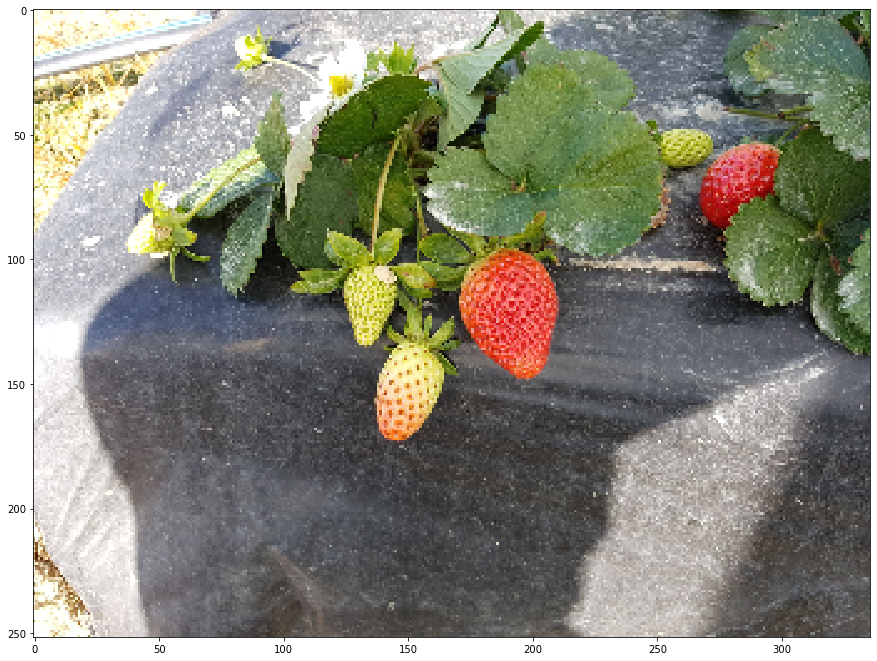

In [7]:
# Convert from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize to a third of the size
image = cv2.resize(image, None, fx=1/3, fy=1/3)
show(image)

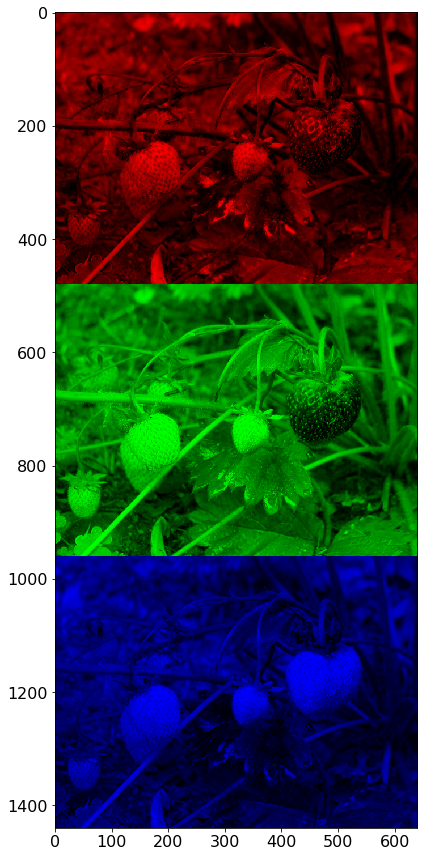

In [24]:
# Show Red/Green/Blue
images = []
for i in [0, 1, 2]:
    colour = image.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 0
    if i != 2: colour[:,:,2] = 0
    images.append(colour)
    
show(np.vstack(images))

In [25]:
def show_rgb_hist(image):
    colours = ('r','g','b')
    for i, c in enumerate(colours):
        plt.figure(figsize=(20, 4))
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
#         plt.plot(histr, color=c, lw=2)
        
        if c == 'r': colours = [((i/256, 0, 0)) for i in range(0, 256)]
        if c == 'g': colours = [((0, i/256, 0)) for i in range(0, 256)]
        if c == 'b': colours = [((0, 0, i/256)) for i in range(0, 256)]
        
        plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
#         plt.xlim([0, 256])

        plt.show()
    
    show_rgb_hist(image)

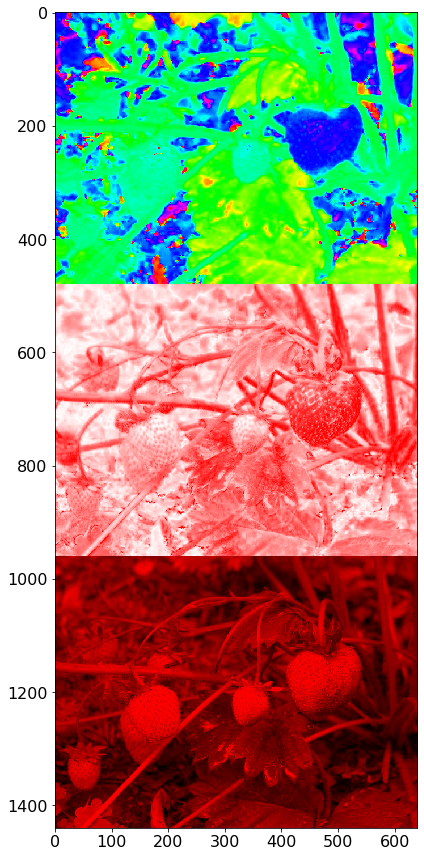

In [26]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

images = []
for i in [0, 1, 2]:
    colour = hsv.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 255
    if i != 2: colour[:,:,2] = 255
    images.append(colour)
    
hsv_stack = np.vstack(images)
rgb_stack = cv2.cvtColor(hsv_stack, cv2.COLOR_HSV2RGB)
show(rgb_stack)

In [27]:
matplotlib.rcParams.update({'font.size': 16})

def show_hsv_hist(image):
    # Hue
    plt.figure(figsize=(20, 3))
    histr = cv2.calcHist([image], [0], None, [180], [0, 180])
    plt.xlim([0, 180])
    colours = [colors.hsv_to_rgb((i/180, 1, 0.9)) for i in range(0, 180)]
    plt.bar(range(0, 180), histr, color=colours, edgecolor=colours, width=1)
    plt.title('Hue')

    # Saturation
    plt.figure(figsize=(20, 3))
    histr = cv2.calcHist([image], [1], None, [256], [0, 256])
    plt.xlim([0, 256])

    colours = [colors.hsv_to_rgb((0, i/256, 1)) for i in range(0, 256)]
    plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
    plt.title('Saturation')

    # Value
    plt.figure(figsize=(20, 3))
    histr = cv2.calcHist([image], [2], None, [256], [0, 256])
    plt.xlim([0, 256])

    colours = [colors.hsv_to_rgb((0, 1, i/256)) for i in range(0, 256)]
    plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)
    plt.title('Value')
    
#show_hsv_hist(hsv)

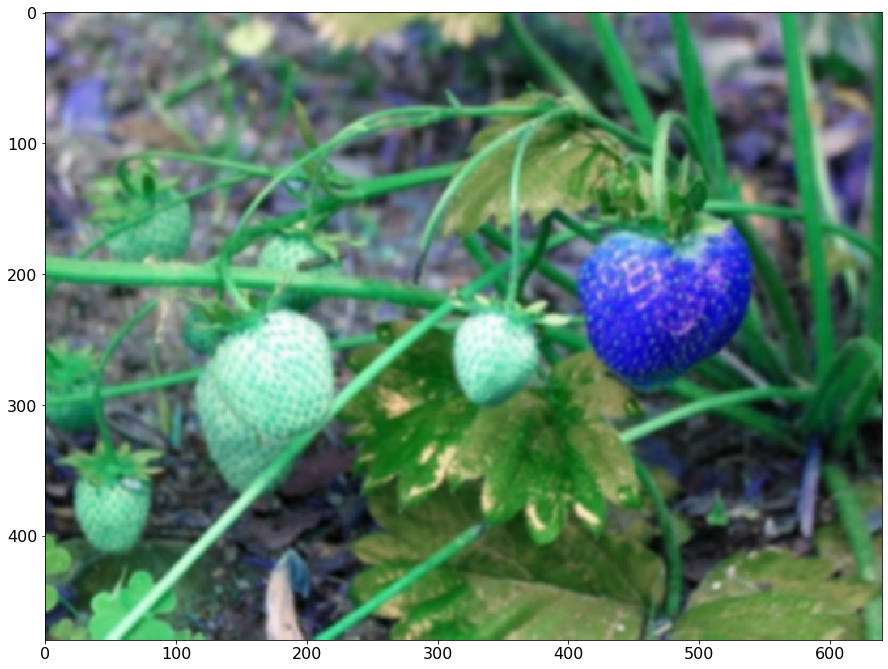

In [35]:
# Blur image slightly
image_blur = cv2.GaussianBlur(image, (7, 7), 0)
show(image_blur)

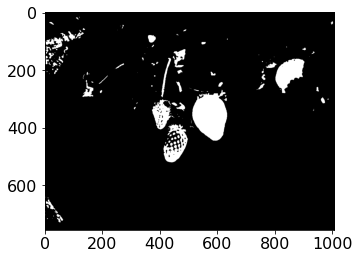

In [42]:
import cv2
import numpy as np

# Load image
image = cv2.imread('8.png')

# Convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Blur image to reduce noise
image_blur = cv2.GaussianBlur(image, (7,7), 0)

# Convert to HSV
image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)

# 0-10 hue
min_red = np.array([0, 100, 0])
max_red = np.array([30, 256, 256])
image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)

# 170-180 hue
min_red2 = np.array([170, 100, 60])
max_red2 = np.array([180, 256, 256])
image_red2 = cv2.inRange(image_blur_hsv, min_red2, max_red2)

# Combine masks
image_red = image_red1 + image_red2

# Show mask
def show_mask(mask):
  plt.imshow(mask, cmap='gray')
  plt.show()

show_mask(image_red)

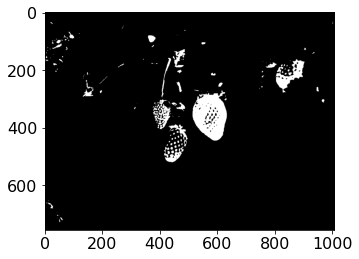

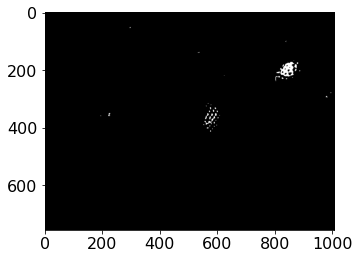

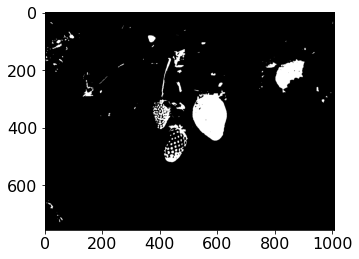

In [64]:
image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)

# 0-10 hue
# min_red = np.array([100, 100, 0])
# max_red = np.array([55, 10, 51])
min_red = np.array([0, 130, 0])
max_red = np.array([30, 256, 256])
image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)

# 170-180 hue
min_red2 = np.array([60, 100, 0])
max_red2 = np.array([180, 256, 256])
image_red2 = cv2.inRange(image_blur_hsv, min_red2, max_red2)

show_mask(image_red1)
show_mask(image_red2)
image_red = image_red1 + image_red2
show_mask(image_red)

In [44]:
image_red

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

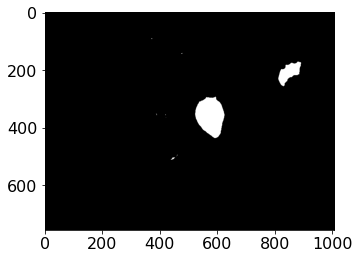

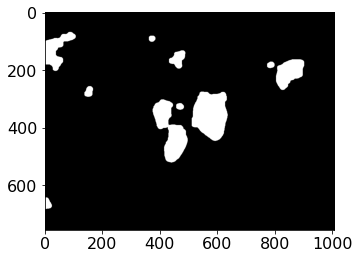

In [52]:
# Clean up
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))

image_red_eroded = cv2.morphologyEx(image_red, cv2.MORPH_ERODE, kernel)
show_mask(image_red_eroded)

# image_red_dilated = cv2.morphologyEx(image_red, cv2.MORPH_DILATE, kernel)
# show_mask(image_red_dilated)

# image_red_opened = cv2.morphologyEx(image_red, cv2.MORPH_OPEN, kernel)
# show_mask(image_red_opened)

# Fill small gaps
# image_red_closed = cv2.morphologyEx(image_red, cv2.MORPH_CLOSE, kernel)
# show_mask(image_red_closed)

# Remove specks
image_red_closed_then_opened = cv2.morphologyEx(image_red_closed, cv2.MORPH_OPEN, kernel)
show_mask(image_red_closed_then_opened)

In [48]:
image_red_closed_then_opened.shape

(756, 1008)

In [47]:
def find_biggest_contour(image):
    
    # Copy to prevent modification
    image = image.copy()
    img, contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    #print len(contours)

    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
 
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

big_contour, red_mask = find_biggest_contour(image_red_closed_then_opened)
show_mask(red_mask)

ValueError: not enough values to unpack (expected 3, got 2)

In [33]:
overlay_mask(red_mask, image)

NameError: name 'red_mask' is not defined

In [49]:
# Centre of mass
moments = cv2.moments(red_mask)
centre_of_mass = int(moments['m10'] / moments['m00']), int(moments['m01'] / moments['m00'])
image_with_com = image.copy()
cv2.circle(image_with_com, centre_of_mass, 10, (0, 255, 0), -1)
show(image_with_com)

# Bounding ellipse
image_with_ellipse = image.copy()
ellipse = cv2.fitEllipse(big_contour)
cv2.ellipse(image_with_ellipse, ellipse, (0,255,0), 2)
show(image_with_ellipse)

NameError: name 'red_mask' is not defined

In [65]:
# 导入 opencv 的库
import cv2
# 读取图片
img = cv2.imread('berry.jpg')
# 转换成灰度图
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
# 使用 Canny 边缘检测
edges = cv2.Canny(gray,50,150,apertureSize = 3)
# 使用 HoughCircles 寻找圆形
circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=20,maxRadius=50)
# 输出结果
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # 画圆
        cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
        # 画中心点
        cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)

cv2.imshow("strawberry", img)
cv2.waitKey(0)
cv2.destroyAllWindows()